In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix
from tslearn.preprocessing import TimeSeriesScalerMinMax
from tslearn.svm import TimeSeriesSVC

In [2]:
train_df = pd.read_csv("./Lightning7/Lighting7_TRAIN.txt", header=None)
test_df = pd.read_csv("./Lightning7/Lighting7_TEST.txt",header=None)
all_data = pd.concat([train_df, test_df]) #combining data to experiment with different train/test splits

In [3]:
X_train = train_df.values[:,1:]
y_train = train_df.values[:,0]

In [4]:
X_test = test_df.values[:,1:]
y_test = test_df.values[:,0]

In [5]:
np.random.seed(0)

In [6]:
X_train = TimeSeriesScalerMinMax().fit_transform(X_train)

In [7]:
X_test = TimeSeriesScalerMinMax().fit_transform(X_test)

In [24]:
clf = TimeSeriesSVC(kernel="linear", sz=X_train.shape[1], d=X_train.shape[2],probability=True, verbose=True, decision_function_shape='ova')

In [25]:
clf.fit(X_train, y_train)

[LibSVM]

TimeSeriesSVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, d=1,
       decision_function_shape='ova', degree=3, gamma='auto',
       kernel='linear', max_iter=-1, probability=True, random_state=None,
       shrinking=True, sz=319, tol=0.001, verbose=True)

In [26]:
"Correct classification rate: %s" % clf.score(X_test, y_test)

'Correct classification rate: 0.6027397260273972'

In [11]:
clf.decision_function(X_test)

array([[-1.28122168, -0.82997927, -0.58958617, ..., -0.22029671,
         0.49714298,  1.51877381],
       [ 0.39237444, -0.48431242,  1.13608167, ..., -2.38256327,
        -0.36469186,  1.79836542],
       [ 1.49625869,  0.21021477,  1.86717345, ..., -2.28358155,
        -1.16126074, -0.01184661],
       ...,
       [-0.85295265,  0.00699004, -0.73169476, ...,  0.5693353 ,
         0.97570449,  1.19612703],
       [ 0.24994077, -0.26210576, -0.39363211, ..., -0.6232767 ,
         0.06293968,  0.3493182 ],
       [-1.14452493,  0.14625146, -0.72135069, ...,  0.31161839,
         0.71548296,  1.39809809]])

44

{0: 8, 1: 1, 2: 4, 3: 6, 4: 0, 5: 14, 6: 11}

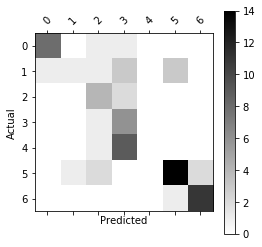

In [21]:
guesses = list(map(int, clf.predict(X_test.tolist())))
actual = list(map(int, y_test.tolist()))
correct_classifications_by_class = {i:0 for i in range(0,7)}
for x,y in zip(guesses, actual):
    correct_classifications_by_class[x] += (1 if x == y else 0)
# display(list(zip(guesses, actual)))
total_correctly_classified = sum(correct_classifications_by_class.values())
display(total_correctly_classified)
display(correct_classifications_by_class)
# confusion_matrix(actual, guesses)
def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap=plt.cm.gray_r):
    plt.matshow(df_confusion, cmap=cmap) # imshow
    #plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion.columns))
    plt.xticks(tick_marks, df_confusion.columns, rotation=45)
    plt.yticks(tick_marks, df_confusion.index)
    #plt.tight_layout()
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
plot_confusion_matrix(pd.DataFrame(confusion_matrix(actual, guesses)))

In [14]:
n_classes = len(set(y_train))

In [15]:
n_classes

7

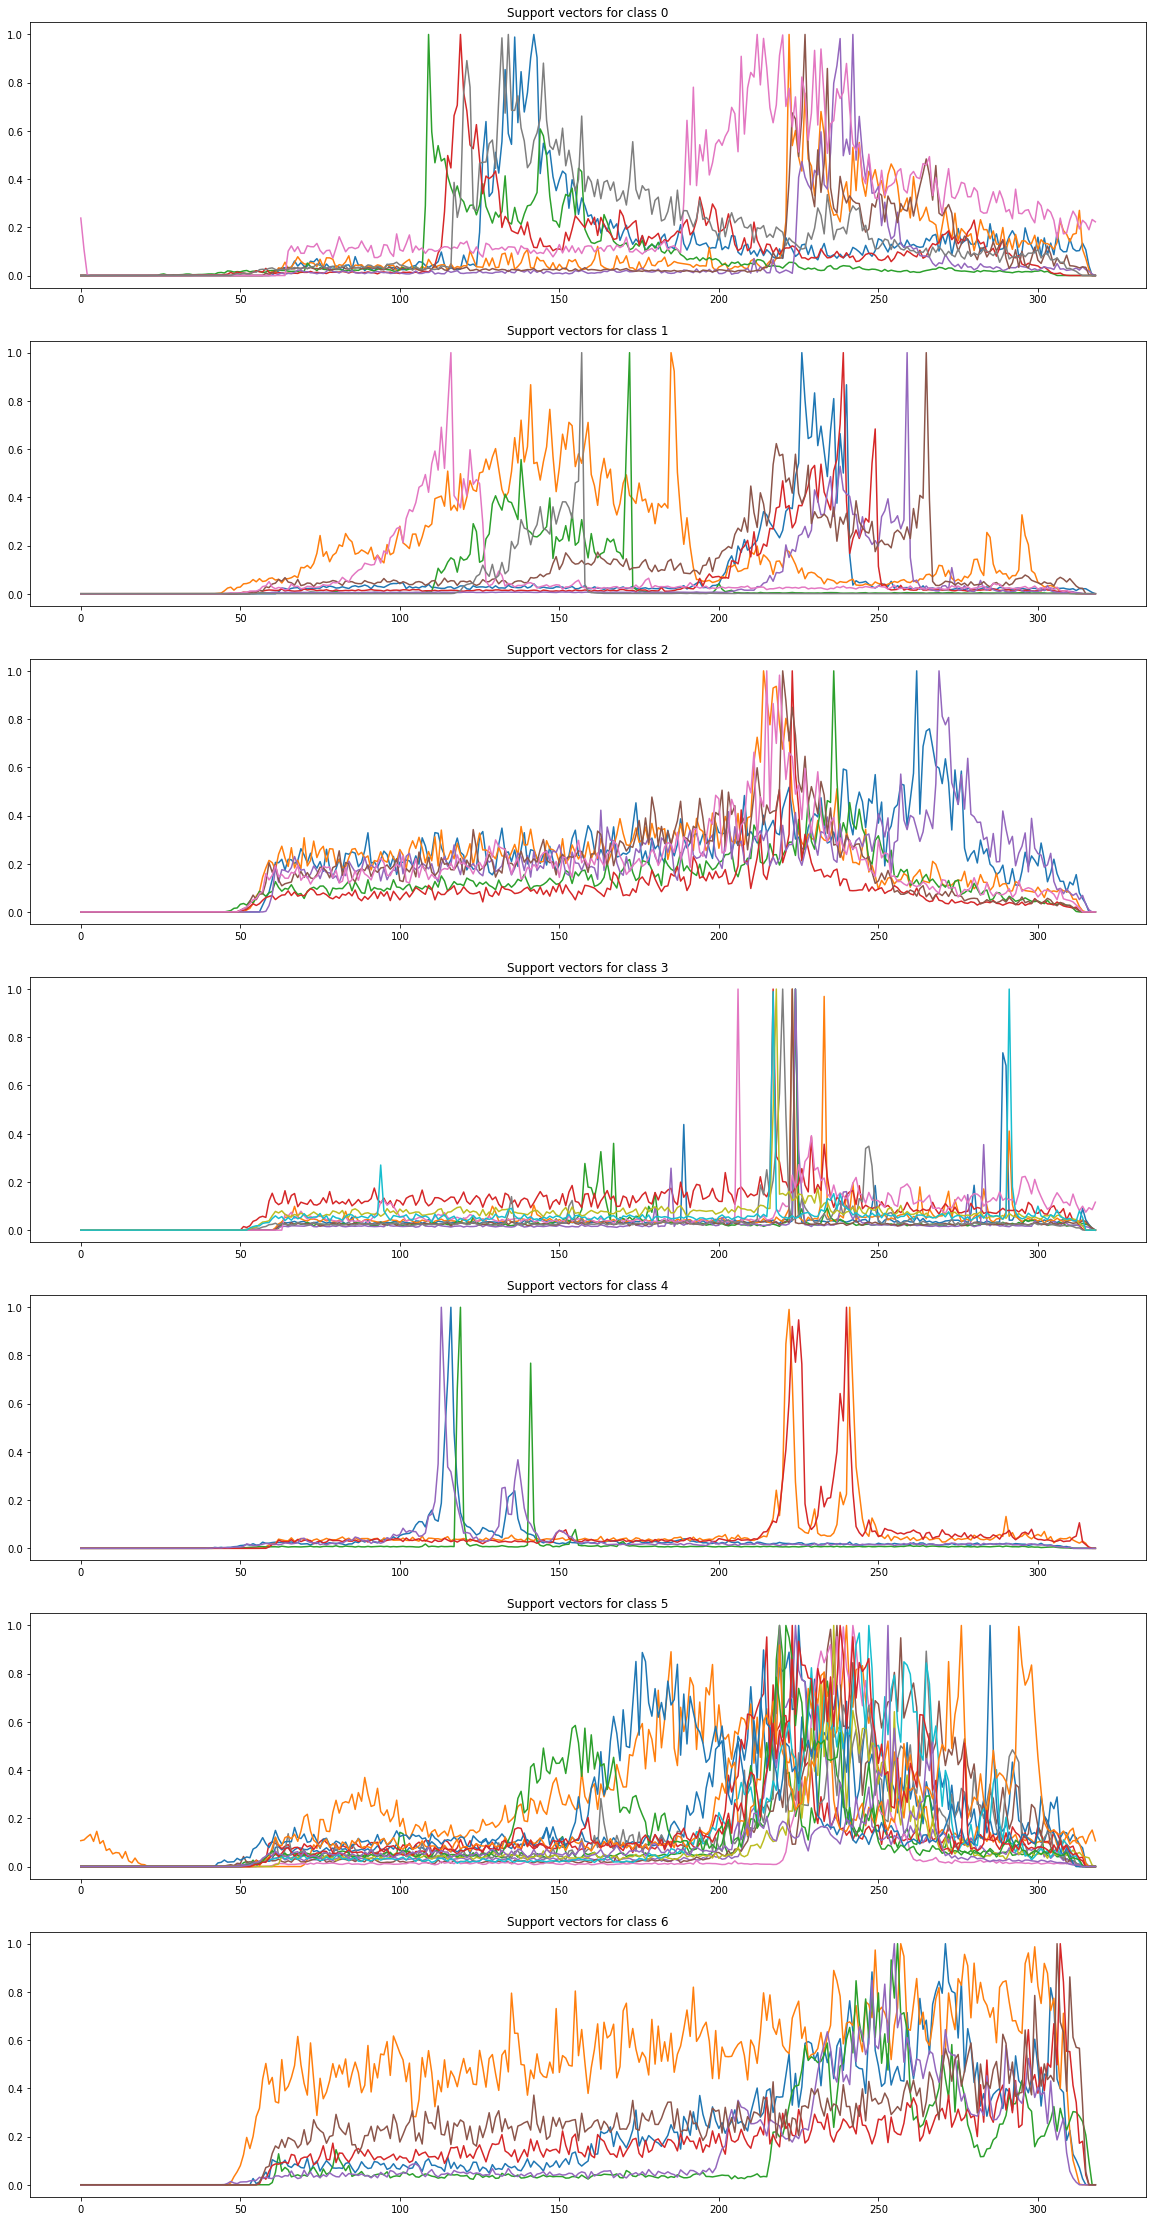

In [23]:
plt.figure(figsize=(20,40))
support_vectors = clf.support_vectors_time_series_(X_train)
for i,cl in enumerate(set(y_train)):
    plt.subplot(n_classes, 1, i+1)
    plt.title("Support vectors for class %d"%cl)
    for ts in support_vectors[i]:
        plt.plot(ts)
# plt.tight_layout()
plt.show()